# Loan Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [2]:
df=pd.read_csv("train_Loan Prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data Analysis

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Data Cleaning

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#replacing null values
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mean())
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["CoapplicantIncome"]=df["CoapplicantIncome"].fillna(df["CoapplicantIncome"].mean())
df['Total_Income']=df['ApplicantIncome']+df["CoapplicantIncome"]
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0


In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

# Data Visualization

In [8]:
target='Loan_Status'

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

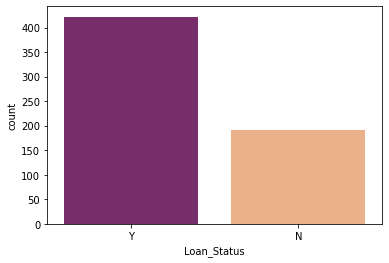

In [9]:
sns.countplot(df['Loan_Status'], palette=['#832375',"#FAAE7B"])

<ipython-input-10-c484da2dfc38>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


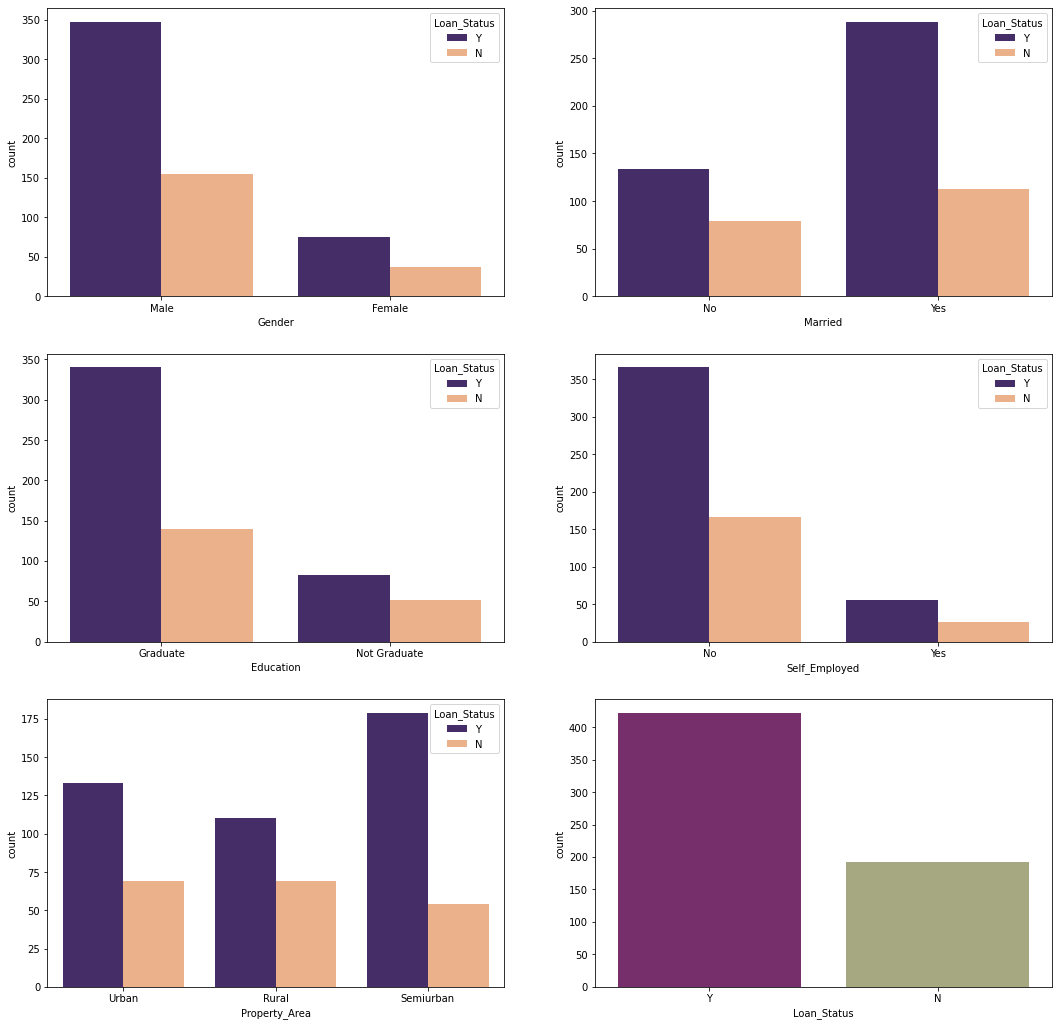

In [10]:
#count plots
fig, ax=plt.subplots(3,2, figsize=(18,18))

sns.countplot(data=df,x=df['Gender'],hue=target, ax=ax[0,0], palette=['#432371',"#FAAE7B"])
sns.countplot(data=df,x=df['Married'],hue=target, ax=ax[0,1], palette=['#432371',"#FAAE7B"])
sns.countplot(data=df,x=df['Education'],hue=target, ax=ax[1,0], palette=['#432371',"#FAAE7B"])
sns.countplot(data=df,x=df['Self_Employed'],hue=target,ax=ax[1,1], palette=['#432371',"#FAAE7B"])
sns.countplot(data=df,x=df['Property_Area'],hue=target,ax=ax[2,0], palette=['#432371',"#FAAE7B"])
sns.countplot(df['Loan_Status'],ax=ax[2,1], palette=['#832375',"#AAAE7B"])
fig.show()

In [11]:
#Normalization of columns using log
df['ApplicantIncome_log']=np.log(df['ApplicantIncome'])
df['CoapplicantIncome_log']=np.log(df['CoapplicantIncome'])
df['LoanAmount_log']=np.log(df['LoanAmount'])   
df['Loan_Amount_Term_log']=np.log(df['Loan_Amount_Term'])
df['Total_Income_log']=np.log(df['Total_Income'])     
df

D:\desktop\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0,7.972466,-inf,4.262680,5.886104,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0,8.320205,-inf,3.688879,5.192957,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0,8.996157,5.480639,5.533389,5.886104,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0,8.933664,-inf,5.231109,5.886104,8.933664


<ipython-input-12-82439b859ffe>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


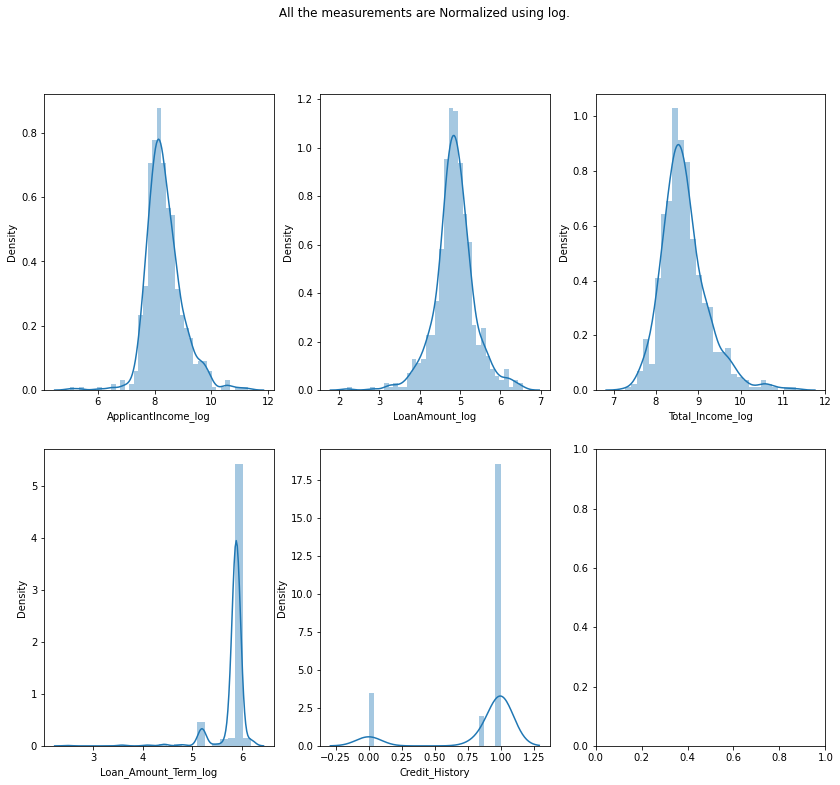

In [12]:
#Distribution plots 
fig, ax=plt.subplots(2,3, figsize=(14,12))
fig.suptitle(" All the measurements are Normalized using log.")
sns.distplot(df['ApplicantIncome_log'], ax=ax[0,0])
sns.distplot(df['LoanAmount_log'], ax=ax[0,1])
sns.distplot(df['Loan_Amount_Term_log'],ax=ax[1,0])
sns.distplot(df['Credit_History'],ax=ax[1,1])
sns.distplot(df['Total_Income_log'], ax=ax[0,2])
#sns.distplot(np.log(df['CoapplicantIncome']), ax=ax[1,2])
fig.show()

Correlation Matrix

<AxesSubplot:>

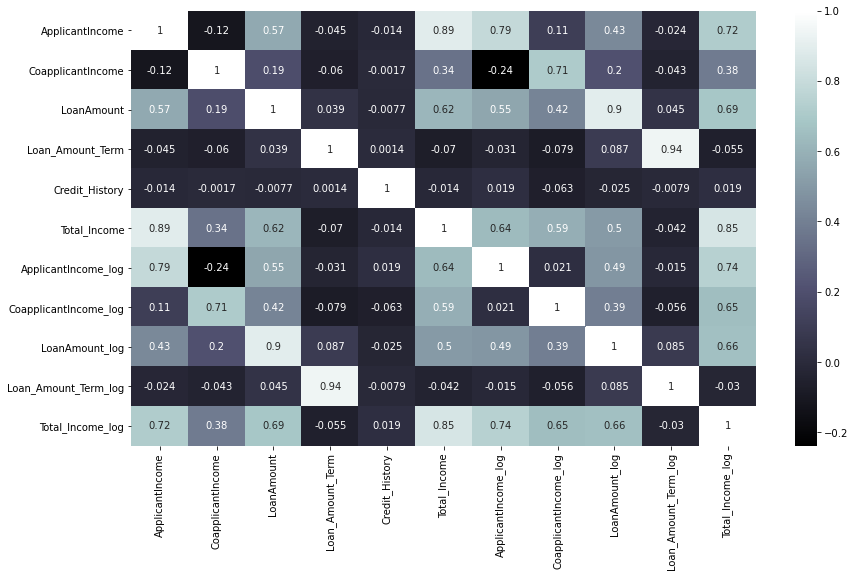

In [13]:
corr=df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, cmap='bone')

Droping unused columns

In [14]:
#
cols=['Loan_ID','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Total_Income','CoapplicantIncome_log']
df_new=df.drop(cols, axis=1)
df_new

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y,7.972466,4.262680,5.886104,7.972466
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y,8.320205,3.688879,5.192957,8.320205
611,Male,Yes,1,Graduate,No,1.0,Urban,Y,8.996157,5.533389,5.886104,9.025456
612,Male,Yes,2,Graduate,No,1.0,Urban,Y,8.933664,5.231109,5.886104,8.933664


<AxesSubplot:>

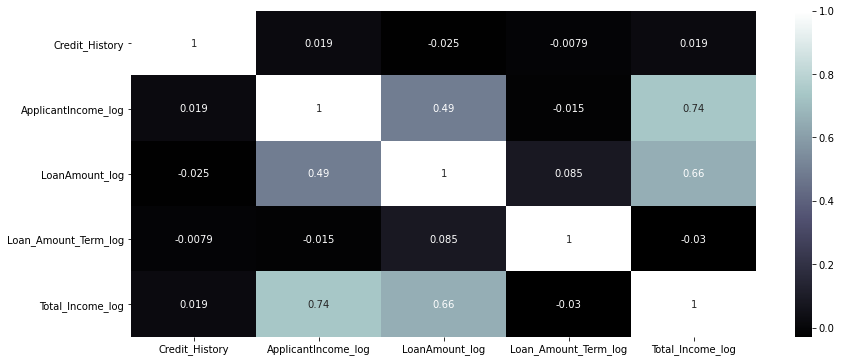

In [15]:
corr=df_new.corr()
plt.figure(figsize=(14,6))
sns.heatmap(corr, annot=True, cmap='bone')

Label Encoding

In [16]:
#converting categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Dependents','Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le=LabelEncoder()
for col in cols:
    df_new[col]=le.fit_transform(df_new[col])
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


# Machine Leaning

train-test-split

In [17]:
from sklearn.model_selection import train_test_split
X=df_new.drop(columns=['Loan_Status'], axis=1)
y=df_new['Loan_Status']
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=42)

Finding accuracy and cross validation of various classification model

In [18]:
from sklearn.model_selection import cross_val_score

def loan(model, x, y):
    model.fit(X_train, y_train)
    
    #accuracy
    print("Accuracy:", model.score(X_test, y_test)*100)
    
    #cross validation
    score=cross_val_score(model, x, y, cv=7)
    print("Cross validation Score:", np.mean(score)*100)


1.Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
loan(model, X, y)

Accuracy: 77.27272727272727
Cross validation Score: 81.11471861471861


2.Decision tree model

In [20]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
loan(model, X,y)

Accuracy: 71.42857142857143
Cross validation Score: 74.27414539483505


3.Random forest model

In [21]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model=RandomForestClassifier()
loan(model, X,y)

Accuracy: 78.57142857142857
Cross validation Score: 79.48574414091655


4.ExtraTreesClassifier

In [22]:
model=ExtraTreesClassifier()
loan(model,X,y)

Accuracy: 74.02597402597402
Cross validation Score: 77.20368711748023


# Confusion Matrix


In [23]:
model=RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
cm

array([[24, 30],
       [ 4, 96]], dtype=int64)

<AxesSubplot:>

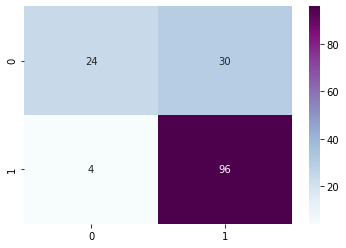

In [25]:
sns.heatmap(cm, annot=True, cmap='BuPu')

1-Yes, 
0-No

Conclusion: The number of correctly predicted 'yes' are 96, wrongly predicted 'yes'are 30.
            The number of correctly predicted 'no' are 24, wrongly predicted 'no' are 4.

Done By: Fatima Mehvash